# Retrait des variables corrélé

In [102]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict,cross_validate
from sklearn.metrics import roc_auc_score,confusion_matrix
clf = GradientBoostingClassifier()

In [103]:
X_train = pd.read_csv("valeo_xtrain.csv",header=None,skiprows=[0])
y_train = pd.read_csv("valeo_ytrain.csv").values.ravel()
X_test = pd.read_csv("valeo_xtest.csv")

X_train.shape,y_train.shape

((27586, 27), (27586,))

In [98]:
X_train = X_train.drop([14,5,7,9,10,13,23,12,11,22,24],axis=1)

In [17]:
var_max=[0,2,4,8,11,14,15,18,19,20,22,24,26,12]
X_train.describe().iloc[2]

0       7.680003
1       0.017038
2       6.488604
3       0.012722
4     442.872201
5       0.470019
6       0.038524
7       0.470019
8      22.006941
9       0.470556
10      0.095668
11     20.583791
12      0.470556
13      0.091749
14      3.935215
15      2.237438
16      0.127719
17      0.253366
18     15.176692
19     29.851088
20     11.815632
21      0.142146
22     12.199751
23      0.442411
24      1.165320
25     10.697002
26      0.264335
Name: std, dtype: float64

In [4]:
#4 Vs 14
X_train.describe().iloc[2].loc[[4,14]]

4     442.872201
14      3.935215
Name: std, dtype: float64

In [5]:
#12 VS 5,7,9,10,13
X_train.describe().iloc[2].loc[[12,5,7,9,10,13]]

12    0.470556
5     0.470019
7     0.470019
9     0.470556
10    0.095668
13    0.091749
Name: std, dtype: float64

In [6]:
#24 Vs 22
X_train.describe().iloc[2].loc[[24,22]]

24     1.165320
22    12.199751
Name: std, dtype: float64

In [51]:
clf = GradientBoostingClassifier()
scores = cross_validate(clf, X_train, y_train,scoring='roc_auc', cv=3,return_estimator=True)
fitted_clf = scores['estimator'][1]
scores['test_score'].mean(),confusion_matrix(y_train, fitted_clf.predict(X_train))

(0.8040055469649287,
 array([[26879,    14],
        [  665,    28]], dtype=int64))

# Toutes les var corrélé à 90%

In [118]:
X_train9 = X_train.drop([14,5,7,9,10,13,23],axis=1)
X_train9.shape

(27586, 20)

In [108]:
scores9 = cross_validate(clf, X_train9, y_train,scoring='roc_auc', cv=3,return_estimator=True)
scores9['test_score'].mean(),confusion_matrix(y_train, scores9['estimator'][1].predict(X_train9))

(0.8008378410211434,
 array([[26875,    18],
        [  663,    30]], dtype=int64))

# Toutes les var corrélé à 80%

In [26]:
#8 VS 12,11,22,24
X_train.describe().iloc[2].loc[[12,8,11,22,24]]

12     0.470556
8     22.006941
11    20.583791
22    12.199751
24     1.165320
Name: std, dtype: float64

In [117]:
X_train8 = X_train9.drop([12,11,22,24],axis=1)
X_train8.shape

(27586, 16)

In [114]:
scores8 = cross_validate(clf, X_train8, y_train,scoring='roc_auc', cv=3,return_estimator=True)
scores8['test_score'].mean(),confusion_matrix(y_train, scores8['estimator'][1].predict(X_train8))

(0.8054351434523546,
 array([[26867,    26],
        [  664,    29]], dtype=int64))

# Toutes les var corrélé à 70%
On stop là car on a perdu de la précision

In [54]:
#4vs 21
#8 vs 25
X_train.describe().iloc[2].loc[[8,25]]

8     22.006941
25    10.697002
Name: std, dtype: float64

In [106]:
X_train7 = X_train8.drop([21,25],axis=1)

In [116]:
scores7 = cross_validate(clf, X_train7, y_train,scoring='roc_auc', cv=3,return_estimator=True)
scores7['test_score'].mean(),confusion_matrix(y_train, scores7['estimator'][1].predict(X_train7))

(0.7932288323910958,
 array([[26874,    19],
        [  666,    27]], dtype=int64))

# Toutes les var corrélé à 60%

In [58]:
#0 vs 8
#18 vs 19
X_train.describe().iloc[2].loc[[18,19]]

18    15.176692
19    29.851088
Name: std, dtype: float64

In [59]:
X_train6 = X_train7.drop([0,18],axis=1)

In [110]:
scores6 = cross_validate(clf, X_train6, y_train,scoring='roc_auc', cv=3,return_estimator=True)
scores6['test_score'].mean(),confusion_matrix(y_train, scores6['estimator'][1].predict(X_train6))

(0.7966887590528651,
 array([[26875,    18],
        [  666,    27]], dtype=int64))

# Toutes les var corrélé à 50%

In [63]:
X_train5 = X_train6.drop([8],axis=1)

In [111]:
scores5 = cross_validate(clf, X_train5, y_train,scoring='roc_auc', cv=3,return_estimator=True)
scores5['test_score'].mean(),confusion_matrix(y_train, scores5['estimator'][1].predict(X_train5))

(0.7962022812730719,
 array([[26867,    26],
        [  667,    26]], dtype=int64))

# Toutes les var corrélé à 30%

In [68]:
#2 vs 4
#17vs 16
X_train.describe().iloc[2].loc[[17,16]]

17    0.253366
16    0.127719
Name: std, dtype: float64

In [69]:
X_train = X_train.drop([2,16],axis=1)

In [70]:

scores = cross_validate(clf, X_train, y_train,scoring='roc_auc', cv=10,return_estimator=True)
scores['test_score'].mean(),confusion_matrix(y_train, scores['estimator'][10].predict(X_train))

(0.7988420173452737,
 array([[26875,    18],
        [  666,    27]], dtype=int64))

# Toutes les var corrélé à 25%

In [73]:
#15 vs 20
X_train.describe().iloc[2].loc[[15,20]]

15     2.237438
20    11.815632
Name: std, dtype: float64

In [74]:
X_train = X_train.drop([15],axis=1)

In [75]:
clf = GradientBoostingClassifier()
scores = cross_validate(clf, X_train, y_train,scoring='roc_auc', cv=3,return_estimator=True)
fitted_clf = scores['estimator'][1]
scores['test_score'].mean(),confusion_matrix(y_train, fitted_clf.predict(X_train))

(0.798412736731246,
 array([[26871,    22],
        [  667,    26]], dtype=int64))

# Toutes les var corrélé à 20%

In [77]:
#4,17,19,20
X_train.describe().iloc[2].loc[[4,17,19,20]]

4     442.872201
17      0.253366
19     29.851088
20     11.815632
Name: std, dtype: float64

In [78]:
X_train = X_train.drop([20],axis=1)

In [80]:
clf = GradientBoostingClassifier()
scores = cross_validate(clf, X_train, y_train,scoring='roc_auc', cv=3,return_estimator=True)
fitted_clf = scores['estimator'][1]
scores['test_score'].mean(),confusion_matrix(y_train, fitted_clf.predict(X_train))

(0.8004918108004557,
 array([[26870,    23],
        [  666,    27]], dtype=int64))

# Toutes les var corrélé à 10%
on re descend sous les 80

In [86]:
#3,4
#4,17
#19,17
X_train.describe().iloc[2].loc[[4,17]]

4     442.872201
17      0.253366
Name: std, dtype: float64

In [88]:
X_train = X_train.drop([3,17],axis=1)

In [90]:
clf = GradientBoostingClassifier()
scores = cross_validate(clf, X_train, y_train,scoring='roc_auc', cv=3,return_estimator=True)
fitted_clf = scores['estimator'][1]
scores['test_score'].mean(),confusion_matrix(y_train, fitted_clf.predict(X_train))

(0.7818503452290506,
 array([[26870,    23],
        [  667,    26]], dtype=int64))

In [92]:
#4,1,19,6

X_train.describe().iloc[2].loc[[4,1,19,6]]

4     442.872201
1       0.017038
19     29.851088
6       0.038524
Name: std, dtype: float64

In [93]:
X_train = X_train.drop([1,6,19],axis=1)

In [95]:
clf = GradientBoostingClassifier()
scores = cross_validate(clf, X_train, y_train,scoring='roc_auc', cv=3,return_estimator=True)
fitted_clf = scores['estimator'][1]
scores['test_score'].mean(),confusion_matrix(y_train, fitted_clf.predict(X_train))

(0.7400341033331257,
 array([[26891,     2],
        [  687,     6]], dtype=int64))

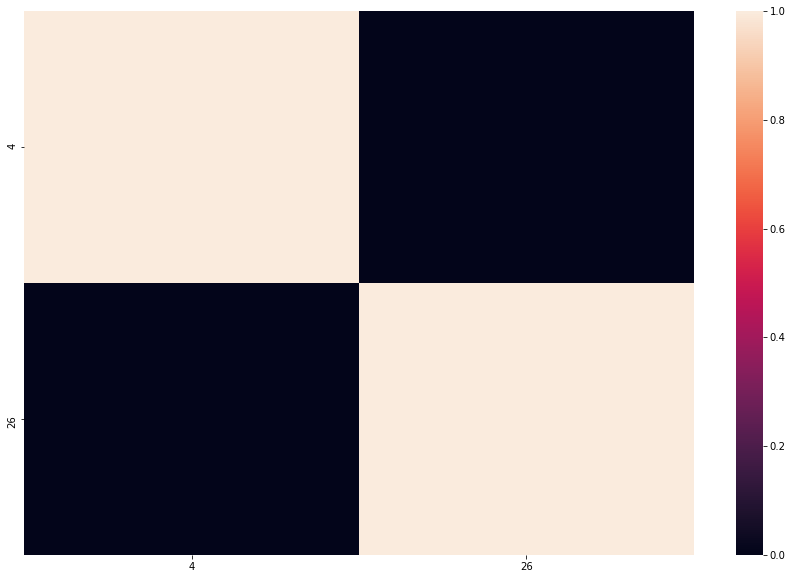

In [94]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr().abs()>0.05);

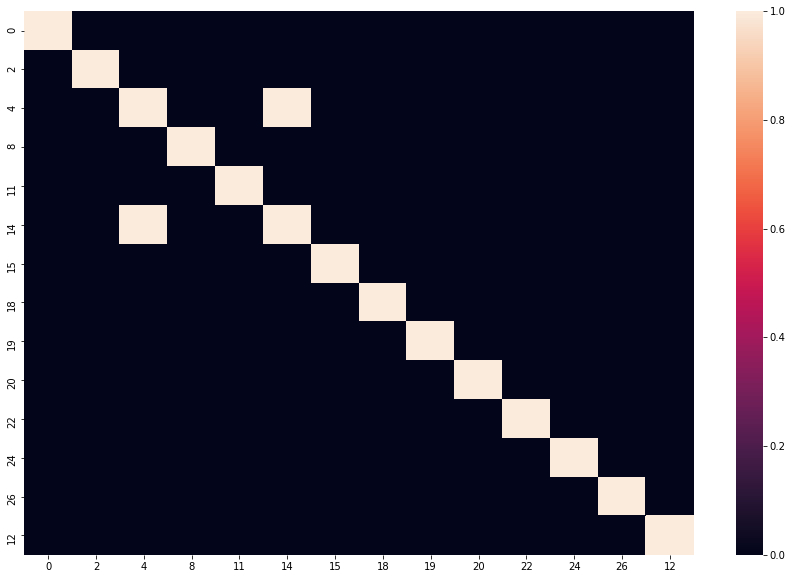

In [22]:
var_max=[0,2,4,8,11,14,15,18,19,20,22,24,26,12]
X_train2 = X_train[var_max]
plt.figure(figsize=(15,10))
sns.heatmap(X_train2.corr().abs()>0.9);

In [32]:

from sklearn.model_selection import cross_val_predict,cross_validate
from sklearn.metrics import roc_auc_score,confusion_matrix

clf = GradientBoostingClassifier()
scores = cross_validate(clf, X_train, y_train,scoring='roc_auc', cv=3,return_estimator=True)
fitted_clf = scores['estimator'][1]
scores['test_score'].mean(),confusion_matrix(y_train, fitted_clf.predict(X_train))

(0.8049543048824801,
 array([[26876,    17],
        [  668,    25]], dtype=int64))